In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Rescaling
from keras.utils import to_categorical
from keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = ['airplane', "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
y_train.shape

(50000, 1)

In [4]:
# y_train shape is (50000, 1) meaning each label is in an array of its own
# flatten the y arrays to be easier to work with
y_train = y_train.flatten()
y_test = y_test.flatten()

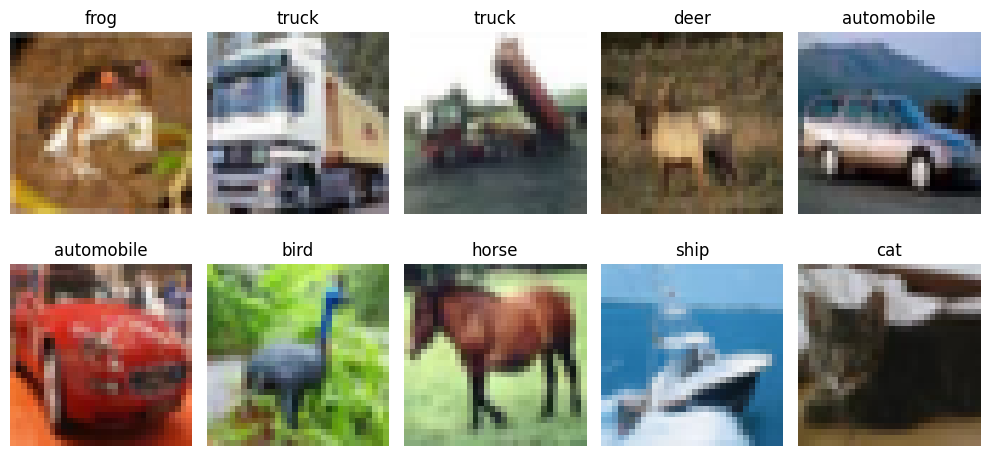

In [5]:
# visualise data points

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

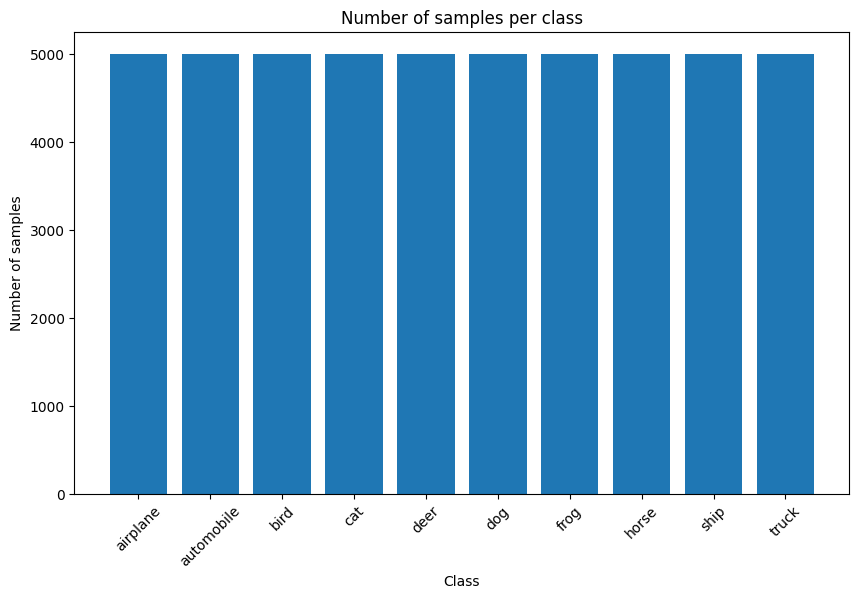

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [6]:
from collections import Counter

labels = y_train

# Count the number of samples per class
class_counts = Counter(labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

# Optional: print counts for reference
for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")


In [7]:
# encode labels as one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
# normalise data to use values between 0 and §
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)

X_train[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.23137257, 0.24313727, 0.24705884],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607845, 0.18823531, 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352945],
        [0.59607846, 0.4901961 , 0.40000004],
        [0.5803922 , 0.48627454, 0.4039216 ]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235297, 0.34509805, 0.21568629],
        [0.4666667 , 0.3254902 , 0.19607845],
        [0.4784314 , 0.34117648, 0.22352943]],

       [[0.09803922, 0.09411766, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215688, 0.10588236, 0.03137255],
        ...,
        [0.46274513, 0.32941177, 0.19607845],
        [0.47058827, 0.32941177, 0.19607845],
        [0.427451  , 0.28627452, 0.16470589]],

       ...,

       [[0.81568635, 0.6666667 , 0.37647063],
        [0.7882

In [10]:
X_train[0].shape

TensorShape([32, 32, 3])

# CNN Model from scrath

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# create model
simple_model = Sequential()

# define the input shape
simple_model.add(Input(shape=(32,32,3)))

simple_model.add(Conv2D(32, (3,3), activation='relu'))
simple_model.add(Conv2D(32, (3,3), activation='relu'))

simple_model.add(MaxPooling2D(2,2))
simple_model.add(Conv2D(64, (3,3), activation='relu'))
simple_model.add(Conv2D(64, (3,3), activation='relu'))


simple_model.add(Flatten())
simple_model.add(Dense(128, activation='relu'))
simple_model.add(Dense(10, activation='softmax'))

simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 886,186 (3.38 MB)

 Trainable params: 886,186 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
epochs = 30
batch_size = 32

from keras.callbacks import EarlyStopping

# early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [13]:

# fit the model using data from the training set for validation
history = simple_model.fit(
    X_train,
    y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping]
    )


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3725 - loss: 1.7098 - val_accuracy: 0.5840 - val_loss: 1.1688
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6003 - loss: 1.1278 - val_accuracy: 0.6324 - val_loss: 1.0293
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6824 - loss: 0.9026 - val_accuracy: 0.6839 - val_loss: 0.9020
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7399 - loss: 0.7421 - val_accuracy: 0.7064 - val_loss: 0.8371
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7885 - loss: 0.5997 - val_accuracy: 0.7060 - val_loss: 0.9021
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8292 - loss: 0.4856 - val_accuracy: 0.7026 - val_loss: 0.9315
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8715 - loss: 0.3676 - val_accuracy: 0.7124 - val_loss: 0.9672


In [14]:
# evaluate the model
loss, accuracy = simple_model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

simple_model.save("simple_cnn_jesus.keras")




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6985 - loss: 0.8534
Test accuracy: 0.6974
Test loss: 0.8613


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report - Simple CNN:

              precision    recall  f1-score   support

    airplane       0.71      0.74      0.73      1000
  automobile       0.86      0.81      0.84      1000
        bird       0.52      0.63      0.57      1000
         cat       0.49      0.55      0.52      1000
        deer       0.70      0.58      0.63      1000
         dog       0.69      0.48      0.57      1000
        frog       0.70      0.83      0.76      1000
       horse       0.80      0.73      0.76      1000
        ship       0.74      0.88      0.80      1000
       truck       0.84      0.76      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



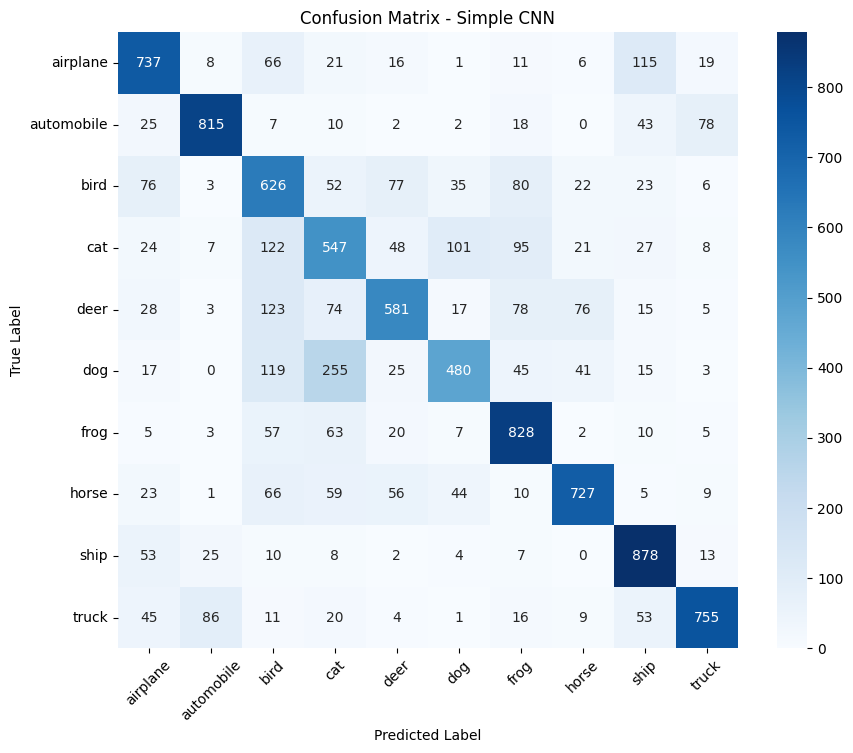

In [ ]:
y_pred_probs_simple = simple_model.predict(X_test)
y_pred_simple = np.argmax(y_pred_probs_simple, axis=1)

# Classification report
report_simple = classification_report(y_test, y_pred_simple, target_names=class_names)
print("Classification Report - Simple CNN:\n")
print(report_simple)

# Matrix confusion
cm_simple = confusion_matrix(y_test, y_pred_simple)

plt.figure(figsize=(10,8))
sns.heatmap(cm_simple, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Simple CNN')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


# Analysis

For this CNN model (8 layers), the class “cat” is one of the most challenging, showing relatively low precision and recall. 
This indicates frequent confusion with visually similar classes such as dogs, as well as confusion between birds 
and airplanes.

The low image resolution of the CIFAR-10 dataset (32×32 pixels) limits the model’s ability to learn highly 
discriminative features.




# Complex CNN Model

In [16]:
from keras.layers import GlobalAveragePooling2D
complex_model  = Sequential()
complex_model.add(Input(shape=(32,32, 3)))

complex_model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
complex_model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
complex_model.add(MaxPooling2D(2,2))
complex_model.add(Dropout(0.25))

complex_model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
complex_model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
complex_model.add(MaxPooling2D(2,2))
complex_model.add(Dropout(0.3))

complex_model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
complex_model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
complex_model.add(MaxPooling2D(2,2))
complex_model.add(Dropout(0.4))


complex_model.add(GlobalAveragePooling2D())
complex_model.add(Dense(128, activation='relu'))
complex_model.add(Dropout(0.5))
complex_model.add(Dense(10, activation='softmax'))

complex_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,810 (1.16 MB)

 Trainable params: 304,810 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
complex_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
complex_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [19]:


# fit the model using data from the training set for validation
complex_history = complex_model.fit(
    X_train,
    y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[complex_early_stopping]
    )

# evaluate the model
loss, accuracy = complex_model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.1988 - loss: 2.0558 - val_accuracy: 0.3555 - val_loss: 1.7143
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4243 - loss: 1.5247 - val_accuracy: 0.5540 - val_loss: 1.2229
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5192 - loss: 1.3155 - val_accuracy: 0.5897 - val_loss: 1.1198
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5778 - loss: 1.1807 - val_accuracy: 0.6303 - val_loss: 1.0198
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6124 - loss: 1.0885 - val_accuracy: 0.6385 - val_loss: 1.0208
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6363 - loss: 1.0270 - val_accuracy: 0.6764 - val_loss: 0.9002
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6581 - loss: 0.9633 - val_accuracy: 0.6877 - val_loss: 0.8732
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6783 - loss: 0.9187 -

In [20]:
complex_model.save("complex_cnn_jesus.keras")

In [21]:


y_pred_probs = complex_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

    airplane       0.85      0.80      0.82      1000
  automobile       0.90      0.91      0.91      1000
        bird       0.76      0.61      0.68      1000
         cat       0.62      0.62      0.62      1000
        deer       0.76      0.76      0.76      1000
         dog       0.69      0.71      0.70      1000
        frog       0.70      0.90      0.79      1000
       horse       0.88      0.81      0.84      1000
        ship       0.86      0.91      0.88      1000
       truck       0.91      0.85      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



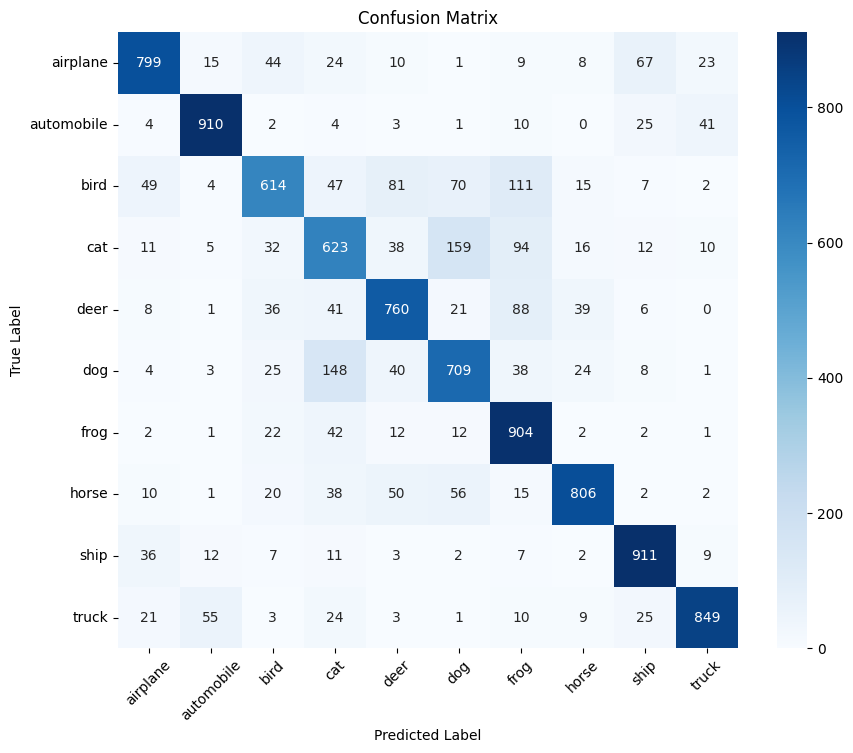

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



# Analysis

This deeper CNN performs better than the first one, with a test accuracy of 0.79. 
Most classes are classified well, though 'cat' and 'bird' are still harder to recognize. 
Dropout and GlobalAveragePooling2D help reduce overfitting, and the extra layers and filters allow the model to learn more detailed features, partially compensating for the low 32×32 CIFAR-10 resolution.


# Comparison of the CNN models

Comparison of CNN Models:

- CNN Model 1:
  • Test accuracy: 0.70
  • Struggles with small and similar classes, e.g., 'cat' and 'dog'.
  • Simpler architecture; limited capacity restricts feature learning.
  
- CNN Model 2 (complex CNN model):
  • Test accuracy: 0.79
  • Improved classification for most classes; 'cat' and 'bird' still challenging.
  • Additional layers, filters, and dropout improve feature extraction and reduce overfitting.

We can see that the second model's performance improved compared to the first one, even with the low image resolution.



# Transfer learning part

In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


In [24]:
# Preprocessing data for MobileNetV2

def preprocess_mobilenet(image, label):
    image = tf.image.resize(image, (224, 224))
    image = preprocess_input(image * 255.0)
    return image, label


In [25]:
batch_size = 32

train_ds_mobilenet = tf.data.Dataset.from_tensor_slices((X_train, y_train_cat))
train_ds_mobilenet = (
    train_ds_mobilenet
    .map(preprocess_mobilenet, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds_mobilenet = tf.data.Dataset.from_tensor_slices((X_test, y_test_cat))
test_ds_mobilenet = (
    test_ds_mobilenet
    .map(preprocess_mobilenet, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)


In [26]:
# Import model

mobilenet = MobileNetV2(
    weights = "imagenet",
    include_top = False,
    input_shape = (224,224, 3)
)

mobilenet.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [27]:
# Build the model
inputs = Input(shape = (224,224, 3))
x = mobilenet(inputs, training = False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation = "relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation = "softmax")(x)
mobilenet_model = Model(inputs, outputs)



In [28]:
mobilenet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mobilenet_model.summary()


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [29]:
early_stop_mobilenet = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history_mobilenet = mobilenet_model.fit(
    train_ds_mobilenet,
    validation_data=test_ds_mobilenet,
    epochs=20,
    callbacks=[early_stop_mobilenet]
)



Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.6760 - loss: 0.9621 - val_accuracy: 0.8314 - val_loss: 0.4957
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7984 - loss: 0.5932 - val_accuracy: 0.8427 - val_loss: 0.4595
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.8150 - loss: 0.5469 - val_accuracy: 0.8418 - val_loss: 0.4564
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.8238 - loss: 0.5197 - val_accuracy: 0.8449 - val_loss: 0.4504
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8313 - loss: 0.4986 - val_accuracy: 0.8487 - val_loss: 0.4415
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8362 - loss: 0.4831 - val_accuracy: 0.8490 - val_loss: 0.4371
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8394 - loss: 0.4703 - val_accuracy: 0.8521 - val_loss: 0.4378
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8425 -

In [30]:
loss, accuracy = mobilenet_model.evaluate(test_ds_mobilenet)
print(f"MobileNetV2 Test Accuracy: {accuracy:.4f}")

y_pred_probs = mobilenet_model.predict(test_ds_mobilenet)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))



313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8474 - loss: 0.4497
MobileNetV2 Test Accuracy: 0.8490
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step
              precision    recall  f1-score   support

    airplane       0.85      0.88      0.86      1000
  automobile       0.93      0.90      0.92      1000
        bird       0.85      0.79      0.82      1000
         cat       0.72      0.73      0.72      1000
        deer       0.84      0.79      0.81      1000
         dog       0.79      0.83      0.81      1000
        frog       0.87      0.88      0.87      1000
       horse       0.84      0.88      0.86      1000
        ship       0.88      0.92      0.90      1000
       truck       0.92      0.91      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:

mobilenet_model.save("mobilenet_model_jesus.keras")


# Analysis of MobileNetV2:


- Most classes show high precision and recall; small and similar classes like 'cat' still remain relatively challenging.
- The pre-trained MobileNetV2 efficiently extracts discriminative features thanks to transfer learning, despite CIFAR-10's low resolution.
- Dropout and dense layers added on top help fine-tune the model and reduce overfitting.
- Overall, leveraging a pre-trained network allows better generalization and faster convergence compared to training a CNN from scratch.


# VGG16 Model

In [31]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import GlobalAvgPool2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping



In [32]:
# Preprocessing data
def preprocess_vgg(image, label):
  image = tf.image.resize(image, (224,224))
  image = preprocess_input(image* 255.0)
  return image,label

In [33]:
train_ds_vgg = tf.data.Dataset.from_tensor_slices((X_train, y_train_cat))
train_ds_vgg = train_ds_vgg.map(preprocess_vgg, num_parallel_calls=tf.data.AUTOTUNE)
train_ds_vgg = train_ds_vgg.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds_vgg = tf.data.Dataset.from_tensor_slices((X_test, y_test_cat))
test_ds_vgg = test_ds_vgg.map(preprocess_vgg, num_parallel_calls=tf.data.AUTOTUNE)
test_ds_vgg = test_ds_vgg.batch(32).prefetch(tf.data.AUTOTUNE)


In [34]:
vgg = VGG16(
    weights = "imagenet",
    include_top = False,
    input_shape = (224,224,3)
)
vgg.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [35]:
inputs = Input(shape=(224, 224, 3))
x = vgg(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation="softmax")(x)

model_vgg = Model(inputs, outputs)


In [36]:
model_vgg.compile(
    optimizer= "adam",
    loss= "categorical_crossentropy",
    metrics = ["accuracy"]
)
model_vgg.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [37]:
estop_vgg = EarlyStopping(
    monitor = "val_loss",
    patience = 3,
    restore_best_weights = True
)

history_vgg = model_vgg.fit(
    train_ds_vgg,
    validation_data = test_ds_vgg,
    epochs = 20,
    callbacks = [estop_vgg]
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 364s 222ms/step - accuracy: 0.6570 - loss: 1.1204 - val_accuracy: 0.8320 - val_loss: 0.4854
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 328s 196ms/step - accuracy: 0.8069 - loss: 0.5614 - val_accuracy: 0.8379 - val_loss: 0.4740
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 306s 195ms/step - accuracy: 0.8246 - loss: 0.5078 - val_accuracy: 0.8562 - val_loss: 0.4242
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 308s 196ms/step - accuracy: 0.8364 - loss: 0.4732 - val_accuracy: 0.8569 - val_loss: 0.4341
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 307s 196ms/step - accuracy: 0.8453 - loss: 0.4557 - val_accuracy: 0.8596 - val_loss: 0.4189
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 340s 216ms/step - accuracy: 0.8508 - loss: 0.4346 - val_accuracy: 0.8602 - val_loss: 0.4160
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 340s 217ms/step - accuracy: 0.8558 - loss: 0.4162 - val_accuracy: 0.8598 - val_loss: 0.4095
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 309s 196ms/step - ac

In [40]:
loss, accuracy = model_vgg.evaluate(test_ds_vgg)
print(f"VGG16 Test Accuracy: {accuracy:.4f}")

y_pred_probs = model_vgg.predict(test_ds_vgg)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred, target_names = class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 161ms/step - accuracy: 0.8587 - loss: 0.4114
VGG16 Test Accuracy: 0.8598
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 163ms/step
              precision    recall  f1-score   support

    airplane       0.89      0.88      0.88      1000
  automobile       0.94      0.90      0.92      1000
        bird       0.81      0.85      0.83      1000
         cat       0.78      0.68      0.73      1000
        deer       0.82      0.84      0.83      1000
         dog       0.80      0.81      0.81      1000
        frog       0.88      0.89      0.89      1000
       horse       0.86      0.90      0.88      1000
        ship       0.92      0.92      0.92      1000
       truck       0.90      0.92      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
model_vgg.save("vgg_model_jesus.keras")


# Analysis of VGG16:

- Test accuracy: 0.86, slightly higher than MobileNetV2.
- Most classes achieve high precision and recall; 'cat' remains the most challenging class.
- The deeper and more parameter-heavy VGG16 captures complex features effectively.
- Global average pooling, dense, and dropout layers on top fine-tune the model and reduce overfitting.
- Transfer learning with VGG16 provides strong feature extraction and generalization, making it the best performing model among those tested.


 # ResNet50 model

In [41]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


In [42]:
def preprocess_resnet(image, label):
    image = tf.image.resize(image, (224, 224))  # Redimensionamos
    image = preprocess_input(image * 255.0)     # Escalado adecuado para ResNet50
    return image, label

# Split manual: 80% train / 20% validation
X_val = X_train[:10000]
y_val_cat = y_train_cat[:10000]

X_train_sub = X_train[10000:]
y_train_sub = y_train_cat[10000:]



In [43]:
batch_size = 32

# Train dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train_sub, y_train_sub))
train_ds = (
    train_ds
    .map(preprocess_resnet, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# Validation dataset
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val_cat))
val_ds = (
    val_ds
    .map(preprocess_resnet, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# Test dataset
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_cat))
test_ds = (
    test_ds
    .map(preprocess_resnet, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)


In [44]:
resnet_base = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

resnet_base.trainable = False  # Congelar la base


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [45]:
inputs = Input(shape=(224, 224, 3))
x = resnet_base(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation="softmax")(x)

resnet_model = Model(inputs, outputs)


In [46]:
resnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

resnet_model.summary()


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [48]:
early_stop_resnet = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history_resnet = resnet_model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=[early_stop_resnet]
)



Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 116ms/step - accuracy: 0.7705 - loss: 0.6993 - val_accuracy: 0.8843 - val_loss: 0.3244
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 123ms/step - accuracy: 0.8660 - loss: 0.3957 - val_accuracy: 0.9020 - val_loss: 0.2866
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 155s 123ms/step - accuracy: 0.8830 - loss: 0.3496 - val_accuracy: 0.9039 - val_loss: 0.2802
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 154s 122ms/step - accuracy: 0.8895 - loss: 0.3255 - val_accuracy: 0.9057 - val_loss: 0.2770
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 110ms/step - accuracy: 0.8955 - loss: 0.3050 - val_accuracy: 0.8959 - val_loss: 0.3001
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 110ms/step - accuracy: 0.9002 - loss: 0.2923 - val_accuracy: 0.9080 - val_loss: 0.2712
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.9041 - loss: 0.2750 - val_accuracy: 0.9056 - val_loss: 0.2744
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 110ms/step - ac

In [49]:
loss, accuracy = resnet_model.evaluate(test_ds)
print(f"ResNet50 Test Accuracy: {accuracy:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.9029 - loss: 0.2919
ResNet50 Test Accuracy: 0.9060


In [50]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred_probs = resnet_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))




313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step
              precision    recall  f1-score   support

    airplane       0.91      0.94      0.92      1000
  automobile       0.94      0.96      0.95      1000
        bird       0.92      0.87      0.90      1000
         cat       0.82      0.80      0.81      1000
        deer       0.90      0.88      0.89      1000
         dog       0.81      0.90      0.86      1000
        frog       0.95      0.91      0.93      1000
       horse       0.93      0.93      0.93      1000
        ship       0.93      0.95      0.94      1000
       truck       0.96      0.91      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
resnet_model.save("mobilenet_model_jesus.keras")


# Analysis of ResNet50:

- Test accuracy: 0.91, the highest among tested models.
- Excellent performance across almost all classes; 'cat' and 'dog' are slightly harder.
- Deep architecture with residual connections allows effective training of very deep layers.
- Global average pooling, dense, and dropout layers help fine-tune and prevent overfitting.
- Transfer learning with ResNet50 provides the most robust feature extraction and generalization for CIFAR-10 images.


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(title)
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step


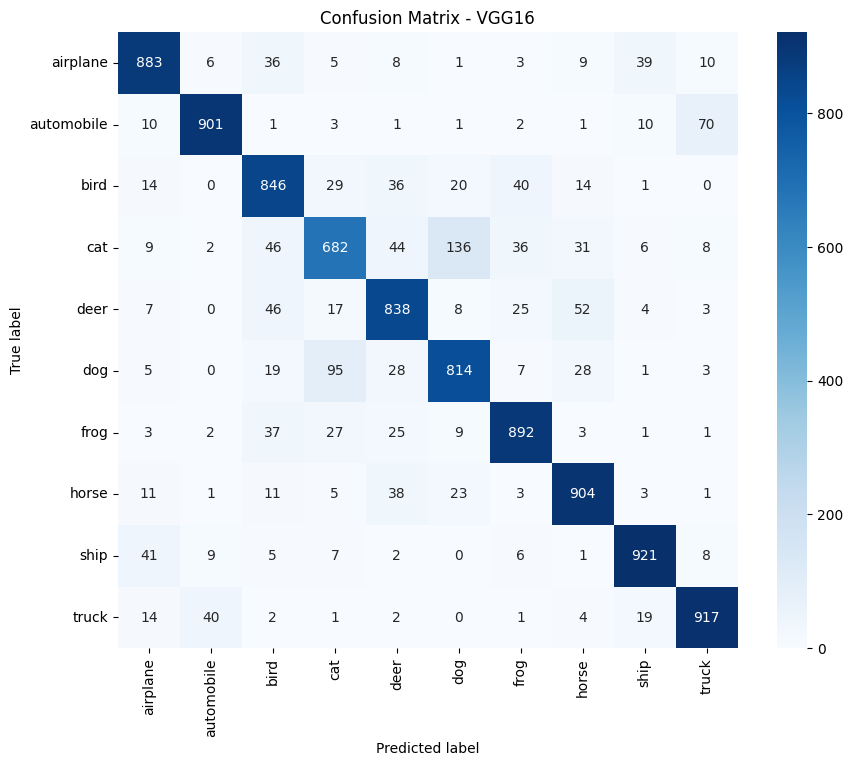

In [52]:
# Predicciones VGG16
y_pred_probs_vgg = model_vgg.predict(test_ds_vgg)
y_pred_vgg = np.argmax(y_pred_probs_vgg, axis=1)

# Confusion Matrix
plot_confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_vgg,
    class_names=class_names,
    title="Confusion Matrix - VGG16"
)


313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step


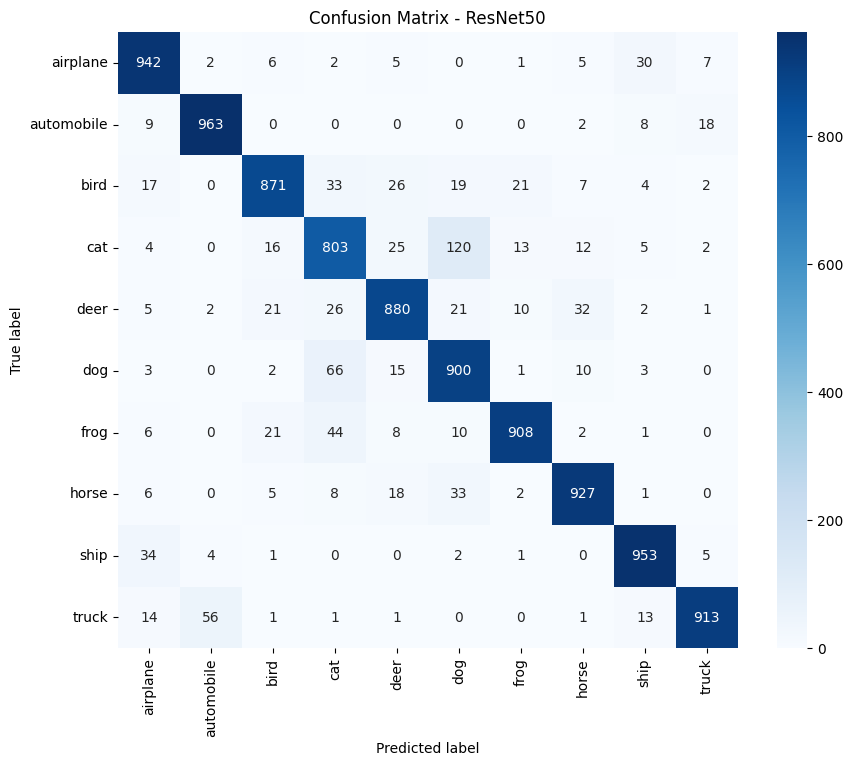

In [53]:
# Predicciones ResNet50
y_pred_probs_resnet = resnet_model.predict(test_ds)
y_pred_resnet = np.argmax(y_pred_probs_resnet, axis=1)

# Confusion Matrix
plot_confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_resnet,
    class_names=class_names,
    title="Confusion Matrix - ResNet50"
)


# Performance Comparison

Best CNN: Test accuracy 0.79 (deeper CNN). Improved over simpler CNNs but still struggled with cat and bird.

Transfer Learning Models:

MobileNetV2: 0.85

VGG16: 0.86

ResNet50: 0.91

Conclusion: Transfer learning, particularly with ResNet50, significantly reduces misclassifications and achieves the highest overall accuracy compared to models trained from scratch.